In [ ]:
### Proszę zrunować ten notatnik a na dole jest komander, który automatycznie
# wykona procedury

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

### T_pqr

In [2]:
# Tworzenie grafu pzrez funkcję
def T_pqr(p,q,r):
    G = nx.Graph()
    if p> 2 and q>2 and r >2:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+q-1,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+q-1)
    if p == 1 or q ==1 or r == 1:
        for i in range(p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p+q+r-3):
            G.add_edge(i,i+1)
    if p == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, 1):
            G.add_edge(i,i+1)
        for i in range (2,q):
            G.add_edge(i,i+1)
            G.add_edge(0,2)
        for i in range(q+1,q+r-1):
            G.add_edge(i,i+1)
            G.add_edge(0,q+1)
    if q ==2 :
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        for i in range(p+2,p+q+r-3):
            G.add_edge(i,i+1)
            G.add_edge(0,p+2)
    if r == 2:
        for i in range(0,p+q+r-2):
            G.add_node(i, waga=i)
        for i in range (0, p-1):
            G.add_edge(i,i+1)
        for i in range (p,p+q-2):
            G.add_edge(i,i+1)
            G.add_edge(0,p)
        G.add_edge(0,p+q-1)
    return G

### T_pqr DLA UST. p,q,r o skończonych reprezentacjach

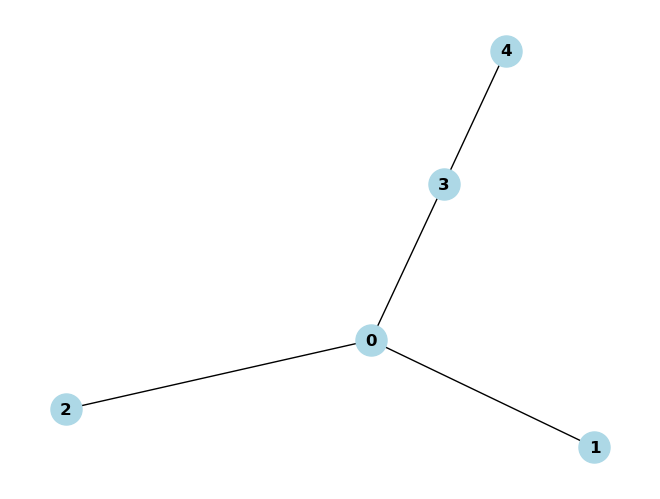

In [3]:
D5 = T_pqr(2,2,3)
labels = {n: D5.nodes[n] for n in D5.nodes}
nx.draw(D5, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

### WAGI WIERZCHOŁKÓW z listy

In [4]:
def nadawanie_wag(G, wagi_lista):
    wagi = []
    for idx, weight in enumerate(wagi_lista):
        G.add_node(idx, weight=weight) 
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

In [5]:
nadawanie_wag(D5, [-1,-2,-3,0])

[-1, -2, -3, 0, None]

### Odbicie do listy

In [6]:
def odbicie(G, node):
    #jeśli chcesz sprawdzić, czy odbicie działa oraz chcesz mieć wypisane wagi, komenda poniżej to umożliwia:
    #print(nadawanie_wag(G, wagi_lista))
    
    wagi = [] 
    
    neighbors = list(G.neighbors(node))
    
    nowa_waga1 = - G.nodes[node]['weight']
    G.nodes[node]['weight'] = nowa_waga1
    
    for neighbor in neighbors:
        nowa_waga = G.nodes[neighbor]['weight'] -  G.nodes[node]['weight']
        G.nodes[neighbor]['weight'] = nowa_waga
    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    return wagi

In [7]:
odbicie(D5,0)

[1, -3, -4, -1, None]

### ro

In [8]:
def ro_1(G):    
    weights = []
    for node in G.nodes():
        G.nodes[node]['weight'] -= 1
        weights.append( G.nodes[node]['weight'])
    return weights

In [9]:
def ro_2(G):    
    weights = []
    for node in G.nodes():
        G.nodes[node]['weight'] += 1
        weights.append( G.nodes[node]['weight'])
    return weights

# omijania miejsc

### Eliminacja minusów

In [10]:
# aby zwiększyć liczbę iteracji do k iteracji, zrób to proszę w miejscu:    
# while count < k:

#ten program odbija w wierzchołkach ujemnych po kolei bez sortu na nich

def zmiana_na_dodatnie_obl(G, wagi_lista):
    def pozytywne(G):
        for node, data in G.nodes(data=True):
            if data['weight'] is not None and data['weight'] < 0:
                return False
        return True
    count = 0
    nodes_z_odbiciem = []
    wagi = []

    nadawanie_wag(G, wagi_lista)
    start = time.time()

    for _ in tqdm(range(10000), desc="zmiana_na_dodatnie_obl"):
        nodes_ujemne = [node for node, data in G.nodes(data=True)
                        if isinstance(data.get('weight'), (int, float)) and data['weight'] < 0]

        for node in nodes_ujemne:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
        count += 1

        if pozytywne(G):
            break

    end = time.time()

    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    print(f"Wierzchołki w kolejności wywoływania: {nodes_z_odbiciem}, wagi na końcu: {wagi}, count= {count}")
    print(f"Czas wykonania: {end - start:.2f} sekundy")


In [11]:
wagi_lista = [-1,0,0,0,0]
G = T_pqr(2,2,3)
zmiana_na_dodatnie_obl(G,wagi_lista)

zmiana_na_dodatnie_obl:   0%|          | 6/10000 [00:00<00:01, 6009.03it/s]

Wierzchołki w kolejności wywoływania: [0, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0], wagi na końcu: [1, 0, 0, 0, 0], count= 7
Czas wykonania: 0.17 sekundy


In [12]:
# aby zwiększyć liczbę iteracji do k iteracji, zrób to proszę w miejscu:    
# while count < k:

#ten program odbija zawsze w najmniejszym wierzchołku

def zmiana_na_dodatnie(G, wagi_lista):
    def pozytywne(G):
        for node, data in G.nodes(data=True):
            if data['weight'] is not None and data['weight'] < 0:
                return False
        return True
    count = 0
    nodes_z_odbiciem = []
    wagi = []

    nadawanie_wag(G, wagi_lista)
    start = time.time()

    for _ in tqdm(range(10000), desc="zmiana_na_dodatnie"):
        sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["weight"], reverse=True)
        nodes_ujemne = [node for node, data in sorted_nodes if isinstance(data['weight'], (int, float)) and data['weight'] < 0]

        for node in nodes_ujemne:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
        count += 1

        if pozytywne(G):
            break

    end = time.time()

    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    print(f"Wierzchołki w kolejności wywoływania: {nodes_z_odbiciem}, wagi na końcu: {wagi}, count= {count}")
    print(f"Czas wykonania: {end - start:.2f} sekundy")


In [13]:
wagi_lista = [-1,0,0,0,0]
G = T_pqr(2,2,3)
zmiana_na_dodatnie(G,wagi_lista)

zmiana_na_dodatnie:   0%|          | 6/10000 [00:00<00:01, 6003.30it/s]

Wierzchołki w kolejności wywoływania: [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0], wagi na końcu: [1, 0, 0, 0, 0], count= 7
Czas wykonania: 0.01 sekundy


### Eliminacja plusów

In [14]:
# aby zwiększyć liczbę iteracji do k iteracji, zrób to proszę w miejscu:    
# while count < k:

#ten program odbija w wierzchołkach ujemnych po kolei bez sortu na nich
def zmiana_na_ujemne_obl(G, wagi_lista):
    def ujemne(G):
        for node, w in G.nodes(data='weight'):
            if w is not None and w > 0:
                return False
        return True
    nodes_z_odbiciem = []
    wagi = []
    count = 0

    nadawanie_wag(G, wagi_lista)
    start = time.time()

    for _ in tqdm(range(10000), desc="zmiana_na_ujemne_obl"):
        nodes_dodatnie = [node for node, data in G.nodes(data=True)
                          if isinstance(data.get('weight'), (int, float)) and data['weight'] > 0]
        for node in nodes_dodatnie:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
        count += 1

        if ujemne(G):
            break

    end = time.time()

    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    print(f"Wierzchołki w kolejności wywoływania: {nodes_z_odbiciem}, wagi na końcu: {wagi}, count = {count}")
    print(f"Czas wykonania: {end - start:.2f} sekundy")


In [15]:
wagi_lista = [1,1,1,0,1]
G = T_pqr(2,2,3)
zmiana_na_ujemne_obl(G,wagi_lista)

zmiana_na_ujemne_obl:   0%|          | 6/10000 [00:00<00:01, 6011.90it/s]

Wierzchołki w kolejności wywoływania: [0, 1, 2, 4, 0, 3, 0, 1, 2, 4, 0, 3, 0, 1, 2, 4, 0, 1, 2], wagi na końcu: [-1, -1, -1, 0, -1], count = 7
Czas wykonania: 0.01 sekundy


In [16]:
# aby zwiększyć liczbę iteracji do k iteracji, zrób to proszę w miejscu:    
# while count < k:

#ten program odbija zawsze w największym wierzchołku

def zmiana_na_ujemne(G, wagi_lista):
    def ujemne(G):
        for node, w in G.nodes(data='weight'):
            if w is not None and w > 0:
                return False
        return True
    nodes_z_odbiciem = []
    wagi = []
    count = 0

    nadawanie_wag(G, wagi_lista)
    start = time.time()

    for _ in tqdm(range(10000), desc="zmiana_na_ujemne"):
        sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["weight"], reverse=False)
        nodes_dodatnie = [node for node, data in sorted_nodes if isinstance(data['weight'], (int, float)) and data['weight'] > 0]
        for node in nodes_dodatnie:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
        count += 1

        if ujemne(G):
            break

    end = time.time()

    for _, w in G.nodes(data='weight'):
        wagi.append(w)
    print(f"Wierzchołki w kolejności wywoływania: {nodes_z_odbiciem}, wagi na końcu: {wagi}, count = {count}")
    print(f"Czas wykonania: {end - start:.2f} sekundy")


In [17]:
wagi_lista = [1,1,1,0,1]
G = T_pqr(2,2,3)
zmiana_na_ujemne(G,wagi_lista)

Wierzchołki w kolejności wywoływania:  [0, 1, 2, 4, 3, 0, 4, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2], wagi na końcu: [-1, -1, -1, 0, -1], count = 7


### Omijanie miejsc plusów

In [16]:
def omijanie_dodatnich(G, wagi_lista, *args, count=0):
    nodes_z_odbiciem = []
    wagi = []
    Y = set(args)

    nadawanie_wag(G, wagi_lista)
    start = time.time()

    for _ in tqdm(range(1001), desc="omijanie_dodatnich"):
        sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1].get("weight", float("inf")), reverse=False)
        nodes_dodatnie = [node for node, data in sorted_nodes if data.get("weight", 0) < 0 and node not in Y]

        if not nodes_dodatnie:
            break
        for node in nodes_dodatnie:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
            count += 1

        if count > 1000:
            print("Maximum number of iterations reached. Exiting loop.")
            break

    end = time.time()

    for _, w in G.nodes(data='weight'):
        wagi.append(w)

    print(f"Wierzchołki w kolejności wywoływania: {nodes_z_odbiciem}, wagi na końcu: {wagi}, count: {count}")
    print(f"Czas wykonania: {end - start:.2f} sekundy")



In [17]:
wagi_lista = [-1,1,0,0,-1]
G = T_pqr(2,2,3)
omijanie_dodatnich(G, wagi_lista,1,2)

omijanie_dodatnich:   0%|          | 3/1001 [00:00<00:00, 2995.22it/s]

Wierzchołki w kolejności wywoływania: [0, 4, 3, 0, 4], wagi na końcu: [1, -1, -2, 0, 1], count: 5
Czas wykonania: 0.01 sekundy


In [18]:
def omijanie_ujemnych(G, wagi_lista, *args, count=0):
    nodes_z_odbiciem = []
    wagi = []
    Y = set(args)

    nadawanie_wag(G, wagi_lista)
    start = time.time()

    for _ in tqdm(range(1001), desc="omijanie_ujemnych"):
        sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1].get("weight", float("inf")), reverse=False)
        nodes_ujemne = [node for node, data in sorted_nodes if data.get("weight", 0) < 0 and node not in Y]

        if not nodes_ujemne:
            break

        for node in nodes_ujemne:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
            count += 1

            if count > 1000:
                print("Maximum number of iterations reached. Exiting loop.")
                break

    end = time.time()

    for _, w in G.nodes(data='weight'):
        wagi.append(w)

    print(f"Wierzchołki w kolejności wywoływania: {nodes_z_odbiciem}, wagi na końcu: {wagi}, count: {count}")
    print(f"Czas wykonania: {end - start:.2f} sekundy")


In [19]:
wagi_lista = [-1,1,0,0,-1]
G = T_pqr(2,2,3)
omijanie_ujemnych(G, wagi_lista,1)

omijanie_ujemnych:   0%|          | 4/1001 [00:00<00:00, 4006.02it/s]

Wierzchołki w kolejności wywoływania: [0, 4, 3, 2, 0, 4, 2, 3], wagi na końcu: [0, -2, 1, 1, 0], count: 8
Czas wykonania: 0.01 sekundy
